# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Data Collection and Analysis

In [2]:
df= pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


1.	age
2.	sex
3.	chest pain type (4 values) [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4.	resting blood pressure
5.	serum cholestoral in mg/dl
6.	fasting blood sugar > 120 mg/dl
7.	resting electrocardiographic results (values 0,1,2)0: Normal  1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >0.05 mV) 2: Showing probable or definite left ventricular hypertrophy
8.	maximum heart rate achieved
9.	exercise induced angina
10.	oldpeak = ST depression induced by exercise relative to rest
11.	the slope of the peak exercise ST segment  ['Down','Flat','Up' ]
12.	number of major vessels (0-3) colored by flourosopy
13.	thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


In [4]:
df.shape

(1025, 14)

# Checking for null values

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Categorical Columns

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
# All categorical columns are already converted into numericals

# Checking whether the data is balanced

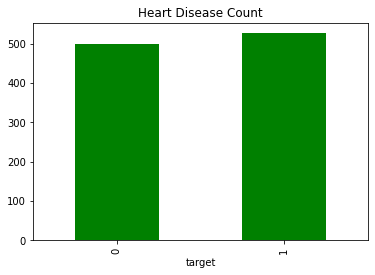

In [8]:
df.groupby('target')[['target']].count().plot(kind='bar',color='g',title='Heart Disease Count',legend=False);

In [9]:
# dataset is quite balanced

In [10]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [11]:
df[df.target==0].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.0
mean,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078,0.0
std,7.908153,0.378059,0.908024,18.576736,49.558924,0.370945,0.544825,22.565235,0.498083,1.290956,0.568932,1.032108,0.685460,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.000000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.000000,284.000000,0.000000,1.000000,156.000000,1.000000,2.500000,2.000000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [12]:
df[df.target==1].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.0
mean,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772,1.0
std,9.631804,0.495498,0.945881,16.112188,53.010345,0.342029,0.502109,19.096928,0.342029,0.771079,0.590295,0.871462,0.468949,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.500000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,265.750000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


### Checking Male and female proportion of data

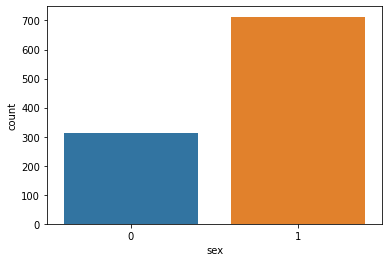

In [13]:
sns.countplot(x=df['sex']);

##### data is more skewed to Male

### Distribution of ages

<Figure size 432x288 with 0 Axes>

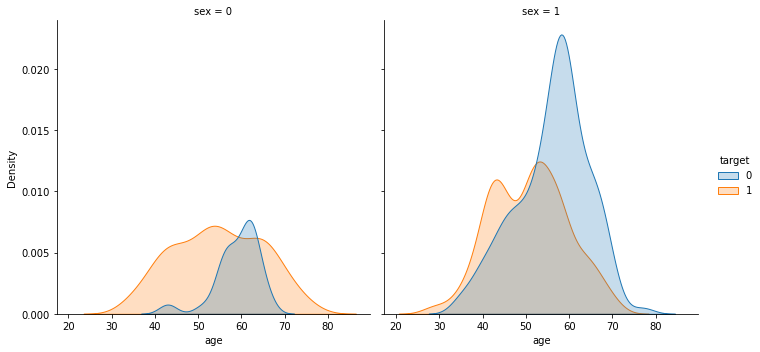

In [14]:
plt.figure()
sns.displot(x='age',hue='target',data=df,fill=True,kind='kde',col='sex')
plt.show()

##### The patients age are between 30 and 70

#### Chest Pain

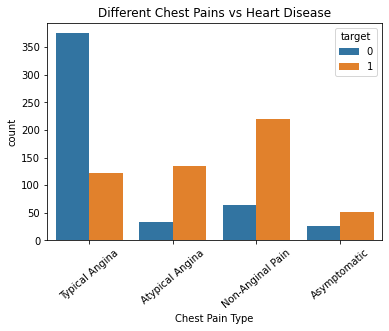

In [15]:
plt.figure()
plt.title("Different Chest Pains vs Heart Disease")
sns.countplot(x='cp',data=df,hue='target')
plt.xticks(ticks=[0,1,2,3],labels=['Typical Angina','Atypical Angina','Non-Anginal Pain','Asymptomatic'],rotation=40)
plt.xlabel('Chest Pain Type')
plt.show()
# 0: Typical Angina: - chest pain related decrease blood supply to the heart
# 1: Atypical Angina: - chest pain not related to heart
# 2: Non-Anginal Pain: - typically esophageal spasms (non heart related)
# 3: Asymptomatic: - chest pain not showing signs of disease

##### Non_Anginal Chest Pain can be a significant symptom for having Heart Disease

### Body Sugar>120 and chance of Heart Disease

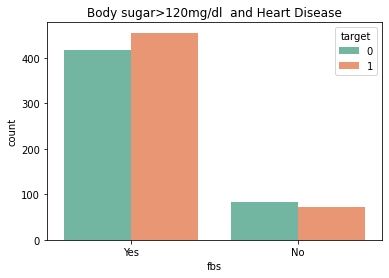

In [16]:
plt.figure()
plt.title("Body sugar>120mg/dl  and Heart Disease")
sns.countplot(x="fbs",data=df,hue='target',palette = "Set2")
plt.xticks(ticks=[0,1],labels=['Yes','No'])
plt.show()

##### No specific relation can be concluded with people heart disease as well as no heart disease with respect to blood sugar level

#### Electrocardio graph, Slope, C,oloured Vessel, Thalassemia wrt Heart Disease

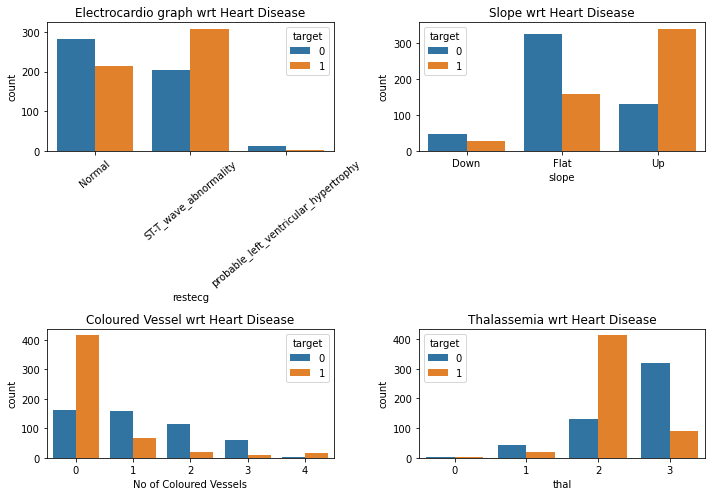

In [17]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
plt.title("Electrocardio graph wrt Heart Disease")
sns.countplot(x='restecg',data=df,hue='target')
plt.xticks(ticks=[0,1,2],labels=["Normal","ST-T_wave_abnormality","probable_left_ventricular_hypertrophy"],rotation=40)
plt.subplot(2,2,2)
plt.title("Slope wrt Heart Disease")
sns.countplot(x='slope',hue='target',data=df)
plt.xticks(ticks=[0,1,2],labels=["Down","Flat","Up"])
plt.subplot(2,2,3)
plt.title("Coloured Vessel wrt Heart Disease")
sns.countplot(x='ca',hue='target',data=df)
plt.xlabel("No of Coloured Vessels")
plt.subplot(2,2,4)
plt.title("Thalassemia wrt Heart Disease")
sns.countplot(x='thal',hue='target',data=df)
plt.tight_layout()
plt.show()

### Checking Correlation between numerical variables

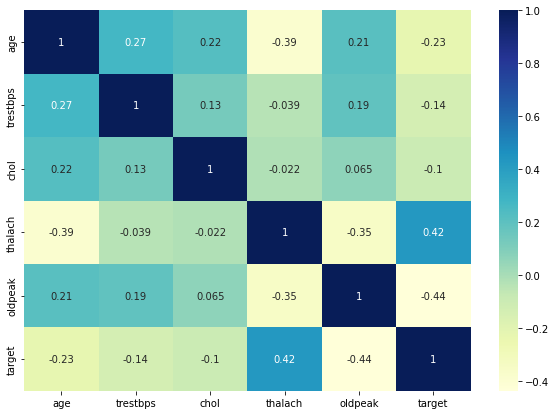

In [18]:
# Checking Correlation for numerical values
plt.figure(figsize=(10,7))
sns.heatmap(df[['age','trestbps','chol','thalach','oldpeak','target']].corr(),annot=True,cmap="YlGnBu")
plt.show()

#### We checked the correlation for different numerical variables and there was no clear correlation between any two variables therefore we are using all these columns for model building.

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler_age = StandardScaler()
scaler_trestbps=StandardScaler()
scaler_chol=StandardScaler()
scaler_thalach=StandardScaler()
scaler_oldpeak=StandardScaler()
df.age=scaler_age.fit_transform(df[['age']])
df.trestbps=scaler_trestbps.fit_transform(df[['trestbps']])
df.chol=scaler_chol.fit_transform(df[['chol']])
df.thalach=scaler_thalach.fit_transform(df[['thalach']])
df.oldpeak=scaler_oldpeak.fit_transform(df[['oldpeak']])

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0


In [23]:
X=df.drop('target',axis=1)
Y=np.array(df['target'])

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

# Comparison of Different Algorithms

In [25]:
models =[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNC',KNeighborsClassifier()))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

In [26]:
results = []
names = []
for name,model in models:
    kfold=KFold(n_splits= 10)
    cv_results = cross_val_score(model,x_train,y_train,cv=kfold)
    results.append(cv_results)
    names.append(name)
    print(name,cv_results.mean()*100)

LR 84.75609756097562
LDA 83.41463414634147
KNC 83.04878048780488
DTC 98.65853658536587
NB 83.78048780487805
SVM 89.26829268292681


# Comparison of Algorithms

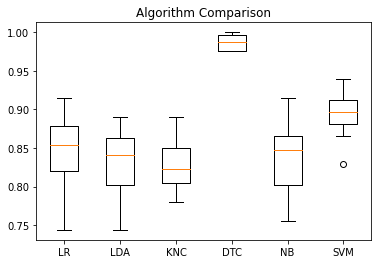

In [27]:
plt.figure()
plt.title("Algorithm Comparison")
plt.boxplot(results)
plt.xticks(ticks=range(1,7),labels=names)
plt.show()

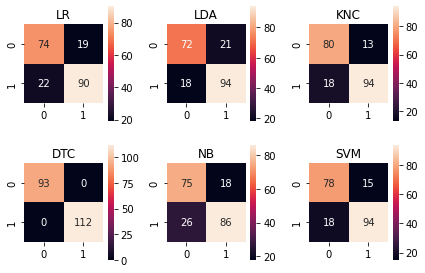

In [28]:
i=1
confusion_matrices=[]

for name,model in models:
    model.fit(x_train,y_train)
    y_pred= model.predict(x_test)
    cm=confusion_matrix(y_test,y_pred)
    confusion_matrices.append((name,cm))
    
    plt.subplot(2,3,i)
    i+=1
    plt.title(name)
    sns.heatmap(cm,annot=True,fmt='g',square=True)
plt.tight_layout()
plt.savefig('heatmap.png')
    

# Recall, Precision, F-Measure

##### Precision quantifies the number of positive class predictions that actually belong to the positive class.
##### Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.
##### F-Measure provides a single score that balances both the concerns of precision and recall in one number

In [29]:
for name,cm in confusion_matrices:
    recall = cm[1][1]/(cm[1][1]+cm[1][0])
    precision= cm[1][1]/(cm[1][1]+cm[0][1])
    print(f'{name}: Recall={recall}, Precision = {precision},F-measure={(2*recall*precision)/(recall+precision)}')
    print('')

LR: Recall=0.8035714285714286, Precision = 0.8256880733944955,F-measure=0.8144796380090498

LDA: Recall=0.8392857142857143, Precision = 0.8173913043478261,F-measure=0.8281938325991189

KNC: Recall=0.8392857142857143, Precision = 0.8785046728971962,F-measure=0.8584474885844748

DTC: Recall=1.0, Precision = 1.0,F-measure=1.0

NB: Recall=0.7678571428571429, Precision = 0.8269230769230769,F-measure=0.7962962962962962

SVM: Recall=0.8392857142857143, Precision = 0.8623853211009175,F-measure=0.8506787330316743



# Voting

In [30]:
estimators = []
model1=DecisionTreeClassifier()
model2=SVC()
model3=LogisticRegression()
estimators.append(('DTC',model1))
estimators.append(('SVM',model2))
estimators.append(('LR',model3))

In [31]:
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators)

In [32]:
kfold = KFold(n_splits = 10)
results = cross_val_score(ensemble, x_train,y_train,cv=kfold)

In [33]:
results

array([0.8902439 , 0.93902439, 0.86585366, 0.93902439, 0.90243902,
       0.8902439 , 0.90243902, 0.87804878, 0.91463415, 0.86585366])

# Final Model

In [34]:
final_model= ensemble.fit(x_train,y_train)

In [35]:
final_model.score(x_train,y_train)

0.9134146341463415

In [36]:
final_model.score(x_test,y_test)

0.8585365853658536

In [37]:
import warnings
warnings.filterwarnings("ignore")

# Testing

In [38]:
input_data=np.array([54,1,0,122,286,0,0,116,1,3.2,1,2,2])

In [39]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0


In [40]:
input_data[0]=scaler_age.transform(input_data[0].reshape(1,-1))
input_data[3]=scaler_trestbps.transform(input_data[3].reshape(1,-1))
input_data[4]=scaler_chol.transform(input_data[4].reshape(1,-1))
input_data[7]=scaler_thalach.transform(input_data[7].reshape(1,-1))
input_data[9]=scaler_oldpeak.transform(input_data[9].reshape(1,-1))

In [41]:
input_pred=final_model.predict(input_data.reshape(1,-1))

In [42]:
if input_pred==1:
    print("The person has possibilities of Heart Disease")
else:
    print("The person has less possibility of having a heart disease")


The person has less possibility of having a heart disease


# Saving the Model and Scaling

In [43]:
import pickle

In [44]:
pickle.dump(final_model,open('heart_pred.sav','wb'))
pickle.dump(scaler_age, open('scaler_age.sav', 'wb'))
pickle.dump(scaler_trestbps, open('scaler_trestbps.sav', 'wb'))
pickle.dump(scaler_chol, open('scaler_chol.sav', 'wb'))
pickle.dump(scaler_thalach, open('scaler_thalach.sav', 'wb'))
pickle.dump(scaler_oldpeak, open('scaler_oldpeak.sav', 'wb'))

# Loading the Model

In [45]:
load_model=pickle.load(open('heart_pred.sav','rb'))

In [46]:
input_data=np.array([54,1,0,122,286,0,0,116,1,3.2,1,2,2])
input_data[0]=scaler_age.transform(input_data[0].reshape(1,-1))
input_data[3]=scaler_trestbps.transform(input_data[3].reshape(1,-1))
input_data[4]=scaler_chol.transform(input_data[4].reshape(1,-1))
input_data[7]=scaler_thalach.transform(input_data[7].reshape(1,-1))
input_data[9]=scaler_oldpeak.transform(input_data[9].reshape(1,-1))
input_pred=load_model.predict(input_data.reshape(1,-1))
if input_pred==1:
    print("The person has possibilities of Heart Disease")
else:
    print("The person has less possibility of having a heart disease")


The person has less possibility of having a heart disease


In [47]:
df.oldpeak.unique()

array([-0.06088839,  1.72713707,  1.30141672, -0.91232909,  0.70540823,
        2.83400998, -0.23117653,  1.81228114,  0.44997602,  1.641993  ,
       -0.3163206 ,  2.66372184,  0.36483196,  0.96084044,  0.02425568,
       -0.65689688, -0.57175281, -0.40146467,  1.98256928,  1.47170486,
        0.10939975,  1.55684893,  2.15285742,  0.27968789, -0.74204095,
        0.7905523 ,  3.85573881, -0.14603246,  0.62026416,  4.36660323,
        2.4934337 ,  1.21627265, -0.48660874, -0.82718502,  0.87569637,
        1.13112858,  2.32314556,  1.04598451,  0.19454382,  2.06771335])

# Deployment

##### 1. Please use pycharm for deployment, enter the below code in the pycharm
##### 2. Copy the models and scaling in the same folder of the pycharm project 
##### 3. Enter code in the Pycharm terminal streamlit run 'the path of the python file'

In [48]:
import streamlit as st
import pickle
import numpy as np

load_model = pickle.load(open('heart_pred.sav','rb'))
scaler_age = pickle.load(open('scaler_age.sav', 'rb'))
scaler_trestbps = pickle.load(open('scaler_trestbps.sav', 'rb'))
scaler_chol = pickle.load(open('scaler_chol.sav', 'rb'))
scaler_thalach = pickle.load(open('scaler_thalach.sav', 'rb'))
scaler_oldpeak = pickle.load(open('scaler_oldpeak.sav', 'rb'))

def heart_disease_prediction(input_data):
    input_data=np.array(input_data)
    input_data[0]=scaler_age.transform(input_data[0].reshape(1,-1))
    input_data[3]=scaler_trestbps.transform(input_data[3].reshape(1,-1))
    input_data[4]=scaler_chol.transform(input_data[4].reshape(1,-1))
    input_data[7]=scaler_thalach.transform(input_data[7].reshape(1,-1))
    input_data[9]=scaler_oldpeak.transform(input_data[9].reshape(1,-1))
    input_pred=load_model.predict(input_data.reshape(1,-1))
    if input_pred==1:
        return("The person has possibilities of Heart Disease")
    else:
        return("The person has less possibility of having a heart disease")
def main():
    st.title('Heart Disease Predictor')
    def str_to_int(h):
        d=1
        if '.' in h:
            d=10**(len(h)-(h.index('.')+1))
            h=h.replace('.','')
        s=0
        for a in h:
            s= int(h)
        return (s/d)
    
    Age = st.text_input('Enter Age:')
    Age =str_to_int(Age)
    
    Sex_M=0
    Sex = st.radio('Select Sex:',['M','F'])
    if Sex == 'M':
        Sex_M=1
       
    Chest_Pain=0
    Chest_Pain_Type=st.radio("Select Type of Chest Pain : ",['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
    if Chest_Pain_Type=='Typical Angina':
        Chest_Pain=0
    elif Chest_Pain_Type== 'Atypical Angina':
        Chest_Pain=1
    elif Chest_Pain_Type == 'Non-Anginal Pain':
         Chest_Pain=2
    elif Chest_Pain_Type == 'Asymptomatic':
         Chest_Pain=3
        
    RestingBP = st.text_input('Enter Resting BP: ')
    RestingBP =str_to_int(RestingBP)
    
    Cholesterol = st.text_input('Enter Cholesterol Level:')
    Cholesterol= str_to_int(Cholesterol)
    
    Fasting_BS=0
    FastingBS_level=st.radio("If Fasting Blood Sugar > 120mg/dl",["Yes",'NO'])
    if FastingBS_level=='Yes':
        Fasting_BS=1
    
    resting_ecg=0
    resting_ecg_res=st.radio("Select Resting Electro Cardiograph Results :",['Normal','Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >0.05 mV',
                                                                             'Showing probable or definite left ventricular hypertrophy'])
    if resting_ecg_res=='Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >0.05 mV':
        resting_ecg=1
    elif resting_ecg_res=='Showing probable or definite left ventricular hypertrophy':
        resting_ecg=2
    
    Max_HR_Ach= st.text_input("Enter Maximum Heartrate Achieved")
    Max_HR_Ach =str_to_int(Max_HR_Ach)
    
    E_I_A=0
    EIA=st.radio("Exercise Induced angina : ",["Yes","No"])
    if EIA =="Yes":
        E_I_A=1
    
    oldpeak=st.text_input('ST depression induced by exercise relative to rest:')
    oldpeak =str_to_int(oldpeak)
    
    slope=0
    slope_pe =st.radio("the slope of the peak exercise ST segment: ",['Down','Flat','Up' ])
    if slope_pe=='Down':
        slope=0
    elif slope_pe=="Flat":
        slope=1
    elif slope_pe=="Up":
        slope =2
    
    major_vessels=st.radio("Number of major vessels (0-3) colored by flourosopy",['0','1','2','3'])
    major_vessels=str_to_int(major_vessels)
    
    thal=0
    Thalassemia= st.radio("Enter Thalassemia :",["Normal","Fixed Defect","Reversable Defect"])
    if Thalassemia=="Normal":
        thal=0
    elif Thalassemia == "Fixed Defect":
        thal =1
    elif Thalassemia =="Reversable Defect":
        thal =2
    
    diagnosis=''
    if st.button("Click for Results"):
        diagnosis= heart_disease_prediction([Age,Sex_M,Chest_Pain,RestingBP,Cholesterol,Fasting_BS,resting_ecg,
                                             Max_HR_Ach,E_I_A,oldpeak,slope,major_vessels,thal])
        st.success(diagnosis)
if __name__ == '__main__':
    main()    

2023-01-08 16:44:30.507 
  command:

    streamlit run C:\Users\91994\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
